## 绘制两个股票的日收益率的柱状图

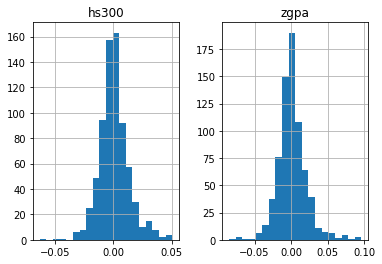

In [8]:
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt

# 将日期作为索引，并修改收盘价为股票名
hs300 = ts.get_k_data('hs300', start='2012-01-01', end='2014-12-31')
hs300 = hs300.set_index('date')
hs300 = hs300.rename(columns={'close':'hs300'})[['hs300']]

# 获取中国平安股票信息
zgpa = ts.get_k_data('601318', start='2012-01-01') # 中国平安
zgpa = zgpa.set_index('date')
zgpa = zgpa.rename(columns={'close':'zgpa'})[['zgpa']]

# 合并
hs300 = hs300.join(zgpa, how='inner')

# 计算日收益率
daily = hs300.copy()
daily[1:] = daily[1:] / daily.values[:-1] - 1
daily.iloc[0] = 0

# 画柱状图
daily.hist(bins = 20)
plt.show()

上面画了两个子图，如果要将柱状图画在同一个图上，应按照如下代码操作。

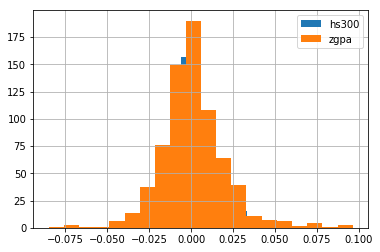

In [11]:
ax = daily['hs300'].hist(bins = 20, label='hs300')
ax = daily['zgpa'].hist(bins = 20, label='zgpa')
plt.legend(loc = 'upper right')
plt.show()

## 画散点图

散点图可以看出两个股票直接的相关性。

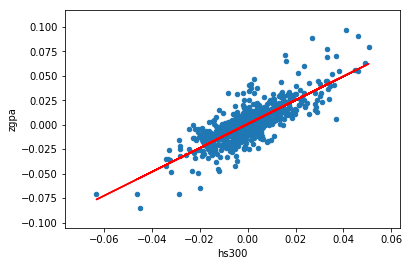

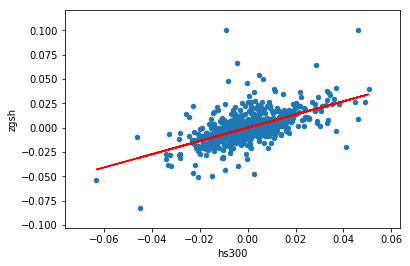

In [24]:
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt

# 将日期作为索引，并修改收盘价为股票名
hs300 = ts.get_k_data('hs300', start='2012-01-01', end='2014-12-31')
hs300 = hs300.set_index('date')
hs300 = hs300.rename(columns={'close':'hs300'})[['hs300']]

# 获取中国平安股票信息
zgpa = ts.get_k_data('601318', start='2012-01-01') # 中国平安
zgpa = zgpa.set_index('date')
zgpa = zgpa.rename(columns={'close':'zgpa'})[['zgpa']]

# 获取中国石化股票信息
zgsh = ts.get_k_data('600028', start='2012-01-01') # 中国石化
zgsh = zgsh.set_index('date')
zgsh = zgsh.rename(columns={'close':'zgsh'})[['zgsh']]

# 合并
hs300 = hs300.join(zgpa, how='inner')
hs300 = hs300.join(zgsh, how='inner')

# 计算日收益率
daily = hs300.copy()
daily[1:] = daily[1:] / daily.values[:-1] - 1
daily.iloc[0] = 0

# 画散点图,沪深300与中国平安
daily.plot(kind='scatter', x='hs300', y='zgpa')
# 拟合直线
beta_zgpa, alpha_zgpa = np.polyfit(daily['hs300'], daily['zgpa'], 1)
plt.plot(daily['hs300'], beta_zgpa*daily['hs300']+alpha_zgpa, '-', color='r')
plt.show()

# 画散点图，沪深300与中国石化
daily.plot(kind='scatter', x='hs300', y='zgsh')
# 拟合直线
beta_zgsh, alpha_zgsh = np.polyfit(daily['hs300'], daily['zgsh'], 1)
plt.plot(daily['hs300'], beta_zgsh*daily['hs300']+alpha_zgsh, '-', color='r')
plt.show()